In [2]:
import numpy as np
import scipy.stats as st

1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [5]:
def min_sample_size(error, dispersion, trust_level):

    # поиск z-score по площади (считаем вероятность и слева и справа)
    
    Z = st.norm.ppf((1+trust_level)/2) # Квантиль нормального распределения.

    sample_size = round(np.square((Z * dispersion)/error))
    
    print(f'Минимально необходимый объем выборки {sample_size}')

In [6]:
min_sample_size(error=3, dispersion=np.sqrt(225), trust_level=0.95)

Минимально необходимый объем выборки 96


2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

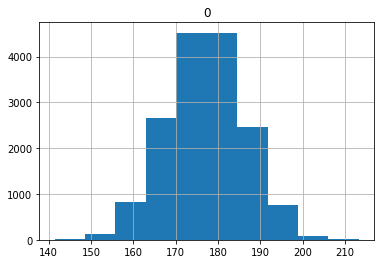

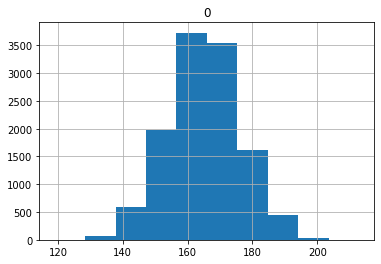

In [7]:
population_men  = st.norm.rvs(loc=177, scale=9, size=16000)  # Выборка мужчин со средним ростом 177
population_women = st.norm.rvs(loc=165, scale=11, size=12000)  # Выборка женщин со средним ростом 165

# Ключевое слово location (loc) определяет среднее значение. 
# Ключевое слово scale (масштаб) определяет стандартное отклонение.

pd.DataFrame(population_men).hist()
pd.DataFrame(population_women).hist()

#### H0 : средний мужской рост равен среднему женскому росту
#### H1 : средний мужской рост отличается от среднего женского роста

In [9]:
# уровень значимости
significance_level = 0.001 

st.ttest_ind(population_men, population_women, equal_var = False)

# p-value < significance_level, аргументов достаточно, чтобы отвергнуть нулевую гипотезу

Ttest_indResult(statistic=96.72975846732676, pvalue=0.0)

p < уровня значимости, аргументов достаточно, чтобы отвергнуть нулевую гипотезу

-----

3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [10]:
min_sample_size(error=50, dispersion=150, trust_level=0.95)

Минимально необходимый объем выборки 35


----------

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [11]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


#### H0 : Маг не умеет предсказывать погоду
#### H1 : Маг умеет предсказывать погоду

In [12]:
# Точный критерий Фишера
oddsratio, pvalue = st.fisher_exact(observations) 

print(oddsratio, pvalue)
# Принимаем Н0 гипотизу

1.1666666666666667 0.828664440194697


Маг не умеет предсказывать погоду

----------

5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 

In [18]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [19]:

def mean_confidence_interval(data, confidence= 0.95):
    n = len(data)
    m, se = np.mean(data), st.sem(data)
    h = se * st.t.ppf((1 +confidence)/2, n)
    return round(m-h,3), round(m,3), round(m+h,3)

mean_confidence_interval(data, 0.90)

(6.074, 6.629, 7.183)

6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [20]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#### H0 : Данные принадлежат одному множеству
#### H1 : Данные не принадлежат одному множеству

In [ ]:
t, p = st.ttest_ind(data_1 ,data_2)
t,p
# Отвергаем H0 гипотезу 

Данные не принадлежат одному множеству

-------

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

    Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


    Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? 

Ответ: 

Если alpha 0.05, то мы сможем отвергнуть нулевую гипотезу о том, что распределение нормальное.

Если 0.01, то не сможем отвергнуть нулевую гипотезу.

--------

8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

    а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

    b) При каком минимальном P-values различия были бы уже значимы? 

#### Н0: репараты А и Б имеют одинаковую эффективность
    
#### Н1: Препараты А и Б имеют разную эффективность

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

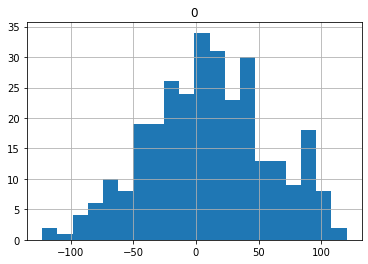

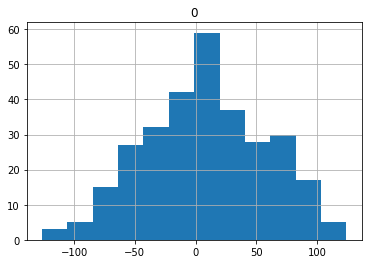

In [29]:
np.random.seed(11)
A = st.norm.rvs(scale=50,loc=10,size=300)
B = A+st.norm.rvs(scale=10,loc=-1.25,size=300)

pd.DataFrame(A).hist(bins=20)
pd.DataFrame(B).hist(bins=12)

In [30]:
# Two-sample T-test
st.ttest_rel(A,B)

Ttest_relResult(statistic=2.2958629051199755, pvalue=0.02237550043463252)

Отвергаем нулевую гипотезу, хотя есть небольшой шанс против этого. 

Можно сказать, что результаты значимы на 5% уровне.

При уровне значимости 2,1% нулевую гипотезу отвергнуть нельзя, различия случайны.